*Think Linear Algebra* is not for sale yet, but if you would like to support this project, you can [buy me a coffee](https://buymeacoffee.com/allendowney).

# Dot Product



[Click here to run this notebook on Colab](https://colab.research.google.com/github/AllenDowney/ThinkLinearAlgebra/blob/main/nb/dot.ipynb).

In [1]:
%load_ext nb_black
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [2]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkLinearAlgebra/raw/main/utils.py")

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import decorate

<IPython.core.display.Javascript object>

## Section

9-foot table (standard regulation)

In [4]:
table_width = 100
table_height = 50

ball_diameter = 2.25
ball_radius = ball_diameter / 2

<IPython.core.display.Javascript object>

In [149]:
from utils import underride, decorate


def draw_circles(vs, **options):
    underride(options, color="C1", alpha=0.6, lw=0)
    ax = options.pop("ax", plt.gca())
    for x, y in vs:
        ax.add_patch(plt.Circle((x, y), ball_radius, **options))

<IPython.core.display.Javascript object>

In [150]:
from utils import cartesian_product


def draw_table():
    fig, ax = plt.subplots(figsize=(5, 2.5))

    ax.add_patch(plt.Rectangle((0, 0), table_width, table_height, fill=None))

    xs = [0, 50, 100]
    ys = [0, 50]
    vs = cartesian_product([xs, ys])
    draw_circles(vs, color="black")

    # Remove ticks and labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # Set the aspect ratio and limits
    ax.set_aspect("equal", adjustable="box")
    ax.set_xlim(0, table_width)
    ax.set_ylim(0, table_height)

<IPython.core.display.Javascript object>

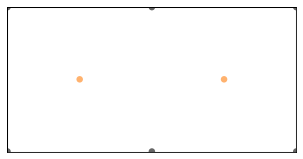

<IPython.core.display.Javascript object>

In [151]:
draw_table()
cue = np.array([25, 25])
target = np.array([75, 25])
draw_circles([cue, target])

In [152]:
from utils import polar_to_cartesian

r = 1
theta = 0.02
direction = np.array(polar_to_cartesian(r, theta))
direction

array([0.99980001, 0.01999867])

<IPython.core.display.Javascript object>

In [153]:
magnitude = 47
v = magnitude * direction

<IPython.core.display.Javascript object>

In [154]:
from numpy.linalg import norm


def distance_between(v1, v2):
    return norm(v1 - v2)

<IPython.core.display.Javascript object>

In [155]:
pos1 = cue + v
pos2 = target
distance_between(pos1, pos2)

np.float64(3.1527715849843063)

<IPython.core.display.Javascript object>

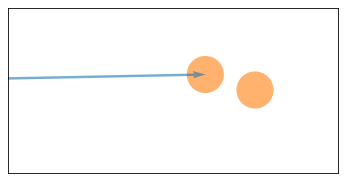

<IPython.core.display.Javascript object>

In [156]:
from utils import quiver

draw_table()
draw_circles([pos1, pos2])
quiver([v], [cue])
decorate(xlim=[60, 80], ylim=[20, 30])

In [157]:
def objective_func(magnitude, theta, pos1, pos2):
    r = 1
    direction = np.array(polar_to_cartesian(r, theta))
    v = magnitude * direction
    return distance_between(pos1 + v, [pos2])

<IPython.core.display.Javascript object>

In [158]:
objective_func(magnitude, theta, cue, target)

np.float64(3.1527715849843063)

<IPython.core.display.Javascript object>

In [159]:
from scipy.optimize import minimize_scalar


def minimize_distance(theta, pos1, pos2):
    args = (theta, pos1, target)

    upper = distance_between(pos1, pos2)
    solution = minimize_scalar(
        objective_func, bounds=(0, upper), args=args, method="bounded"
    )

    assert solution.success
    return solution

<IPython.core.display.Javascript object>

In [160]:
solution = minimize_distance(theta, cue, target)
solution.fun

np.float64(0.9999333346666525)

<IPython.core.display.Javascript object>

In [161]:
def will_hit(theta, pos1, pos2, thresh):
    solution = minimize_distance(theta, cue, target)
    return solution.fun < thresh

<IPython.core.display.Javascript object>

In [162]:
will_hit(theta, cue, target, ball_diameter)

np.True_

<IPython.core.display.Javascript object>

In [163]:
def error_func(magnitude, theta, pos1, pos2, goal_distance):
    actual_distance = objective_func(magnitude, theta, pos1, pos2)
    return actual_distance - goal_distance

<IPython.core.display.Javascript object>

In [164]:
error_func(magnitude, theta, cue, target, ball_diameter)

np.float64(0.9027715849843063)

<IPython.core.display.Javascript object>

In [165]:
upper = np.hypot(distance_between(cue, [target]), ball_diameter)
upper

np.float64(50.050599397010224)

<IPython.core.display.Javascript object>

In [166]:
from scipy.optimize import root_scalar

args = (theta, cue, target, ball_diameter)
solution = root_scalar(error_func, bracket=[0, upper], args=args, method="brentq")
assert solution.converged

<IPython.core.display.Javascript object>

In [167]:
magnitude = solution.root
magnitude

47.97440282236039

<IPython.core.display.Javascript object>

In [168]:
v_soln = magnitude * direction
pos1 = cue + v_soln

<IPython.core.display.Javascript object>

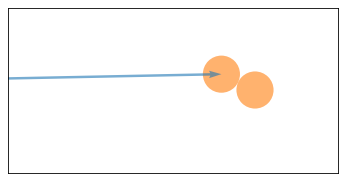

<IPython.core.display.Javascript object>

In [169]:
from utils import quiver

draw_table()
draw_circles([pos1, target])
quiver([v_soln], [cue])
decorate(xlim=[60, 80], ylim=[20, 30])

[Think Linear Algebra](https://allendowney.github.io/ThinkLinearAlgebra/index.html)

Copyright 2025 [Allen B. Downey](https://allendowney.com)

Code license: [MIT License](https://mit-license.org/)

Text license: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)